In [1021]:
#Importar librerias
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [1274]:
#Cargar el dataset en un data frame
df = pd.read_csv(r'C:\Users\GABRIEL\Documents\UNAD\22 ANALISIS DE DATOS\Actividad 3\Anexo 2 - Dataset Vehicle\Car details v3.csv')

In [1251]:
#Exploración Inicial de los Datos
# Mostrar primeras filas del DataFrame
print(df.head())

# Información sobre tipos de datos y valores no nulos
print(df.info())

# Estadísticas descriptivas de variables numéricas
print(df.describe())

                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250N

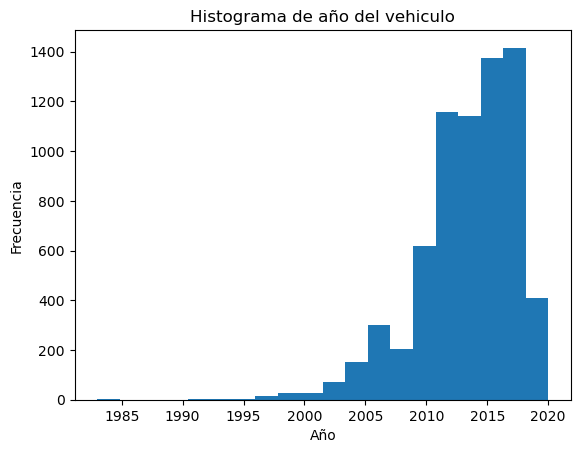

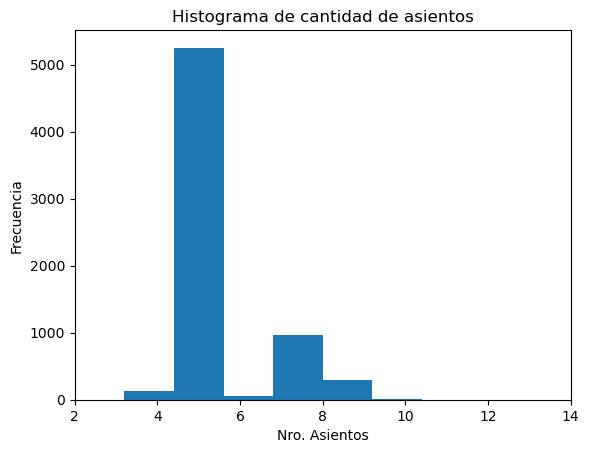

In [1253]:
# Visualización de Datos Básica

# Histogramas

plt.hist(df['year'], bins=20)
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.title('Histograma de año del vehiculo')
plt.show()

plt.hist(df['seats'], bins=10)
plt.xlabel('Nro. Asientos')
plt.ylabel('Frecuencia')
plt.title('Histograma de cantidad de asientos')
plt.xlim(2, 14)
plt.show()

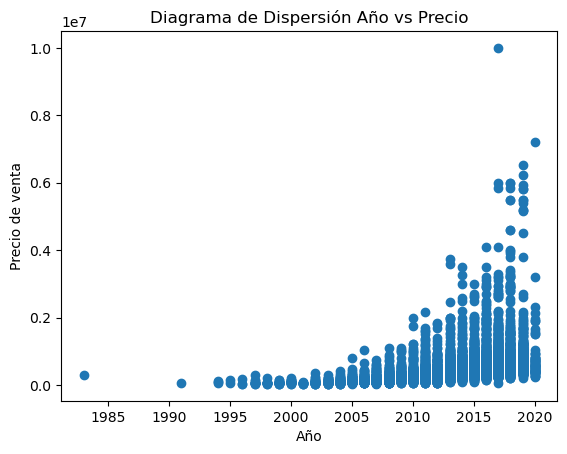

In [1255]:
# Diagrama de dispersión entre dos variables
plt.scatter(df['year'], df['selling_price'])
plt.xlabel('Año')
plt.ylabel('Precio de venta')
plt.title('Diagrama de Dispersión Año vs Precio')
plt.show()

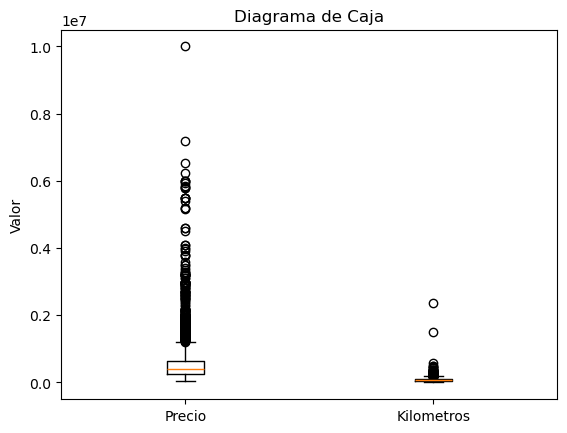

In [1257]:
# Diagrama de caja para detectar valores atípicos
plt.boxplot([df['selling_price'], df['km_driven']], labels=['Precio', 'Kilometros'])
plt.ylabel('Valor')
plt.title('Diagrama de Caja')
plt.show()

In [1259]:
# Manejo de Valores Faltantes y Duplicados
# Eliminar filas duplicadas
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

df.info()

0
<class 'pandas.core.frame.DataFrame'>
Index: 6926 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6926 non-null   object 
 1   year           6926 non-null   int64  
 2   selling_price  6926 non-null   int64  
 3   km_driven      6926 non-null   int64  
 4   fuel           6926 non-null   object 
 5   seller_type    6926 non-null   object 
 6   transmission   6926 non-null   object 
 7   owner          6926 non-null   object 
 8   mileage        6718 non-null   object 
 9   engine         6718 non-null   object 
 10  max_power      6721 non-null   object 
 11  torque         6717 non-null   object 
 12  seats          6718 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 757.5+ KB


In [1261]:
# Verificar valores faltantes en el DataFrame
print(df.isna().sum())

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          208
engine           208
max_power        205
torque           209
seats            208
dtype: int64


In [1263]:
# Verificar la cantidad de registros con al menos un valor nulo
filas_con_nulos = df.isnull().any(axis=1).sum()
print(filas_con_nulos)

209


In [1267]:
#Realizar una copia del df con valores eliminados 
# Calcular el porcentaje de datos a eliminar
porcentaje = (filas_con_nulos / df.shape[0]) * 100
print(f'El porcentaje de datos a eliminar por contar con algún valor nulo es: {porcentaje:.2f}%')

El porcentaje de datos a eliminar por contar con algún valor nulo es: 3.02%


In [ ]:
# El porcentaje es pequeño entonces elimino los registros que tienen valores nulos y lo asigno a un nuevo df
df_sin_nulos = df.dropna()
df_sin_nulos.info()
df.info()

In [1197]:
# Preparar los datos para aplicar el modelo de regresión lineal

# Divido la columna name para extraer la marca y la linea
df_sin_nulos['marca'] = df_sin_nulos['name'].str.split().str[0]
df_sin_nulos['linea'] = df_sin_nulos['name'].str.split(n=1).str[1]

# Divido columnas para extraer datos numéricos
df_sin_nulos['consumo_kmpl'] = df_sin_nulos['mileage'].str.split().str[0]
df_sin_nulos['motor_cc'] = df_sin_nulos['engine'].str.split().str[0]
df_sin_nulos['max_power_bhp'] = df_sin_nulos['max_power'].str.split().str[0]

# Elimino las columnas que no se requieren (segunda parte despues de la división)
df_sin_nulos = df_sin_nulos.drop(columns=['name','mileage','engine','max_power'])

C:\Users\GABRIEL\AppData\Local\Temp\ipykernel_13624\1532066793.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_nulos['marca'] = df_sin_nulos['name'].str.split().str[0]
C:\Users\GABRIEL\AppData\Local\Temp\ipykernel_13624\1532066793.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_nulos['linea'] = df_sin_nulos['name'].str.split(n=1).str[1]
C:\Users\GABRIEL\AppData\Local\Temp\ipykernel_13624\1532066793.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [1199]:
# Verifico el data set despues de los cambios realizados
df_sin_nulos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6717 entries, 0 to 8125
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           6717 non-null   int64  
 1   selling_price  6717 non-null   int64  
 2   km_driven      6717 non-null   int64  
 3   fuel           6717 non-null   object 
 4   seller_type    6717 non-null   object 
 5   transmission   6717 non-null   object 
 6   owner          6717 non-null   object 
 7   torque         6717 non-null   object 
 8   seats          6717 non-null   float64
 9   marca          6717 non-null   object 
 10  linea          6717 non-null   object 
 11  consumo_kmpl   6717 non-null   object 
 12  motor_cc       6717 non-null   object 
 13  max_power_bhp  6717 non-null   object 
dtypes: float64(1), int64(3), object(10)
memory usage: 787.1+ KB


In [1201]:
# Inspecciono las variables categóricas para asignar valores numéricos 
print(df_sin_nulos['fuel'].unique())
print(df_sin_nulos['transmission'].unique())
print(df_sin_nulos['seller_type'].unique())
print(df_sin_nulos['marca'].unique())
print(df_sin_nulos['owner'].unique())

['Diesel' 'Petrol' 'LPG' 'CNG']
['Manual' 'Automatic']
['Individual' 'Dealer' 'Trustmark Dealer']
['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Datsun' 'Jeep' 'Mercedes-Benz' 'Mitsubishi' 'Audi'
 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo' 'Daewoo'
 'Kia' 'Fiat' 'Force' 'Ambassador' 'Ashok' 'Isuzu' 'Opel']
['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']


In [1203]:
print(df_sin_nulos.loc[df_sin_nulos['owner'] == 'Test'])

# Reemplazo los valores de las variables por un valor numérico
df_sin_nulos.loc[df_sin_nulos['owner'] == 'First Owner', 'owner'] = 1
df_sin_nulos.loc[df_sin_nulos['owner'] == 'Second Owner', 'owner'] = 2
df_sin_nulos.loc[df_sin_nulos['owner'] == 'Third Owner', 'owner'] = 3
df_sin_nulos.loc[df_sin_nulos['owner'] == 'Fourth & Above Owner', 'owner'] = 4
df_sin_nulos.loc[df_sin_nulos['owner'] == 'Test Drive Car', 'owner'] = 0

print(df_sin_nulos['owner'].unique())

df_sin_nulos.loc[df_sin_nulos['fuel'] == 'Diesel', 'fuel'] = 1
df_sin_nulos.loc[df_sin_nulos['fuel'] == 'Petrol', 'fuel'] = 2
df_sin_nulos.loc[df_sin_nulos['fuel'] == 'LPG', 'fuel'] = 3
df_sin_nulos.loc[df_sin_nulos['fuel'] == 'CNG', 'fuel'] = 4

print(df_sin_nulos['fuel'].unique())

df_sin_nulos.loc[df_sin_nulos['transmission'] == 'Manual', 'transmission'] = 1
df_sin_nulos.loc[df_sin_nulos['transmission'] == 'Automatic', 'transmission'] = 2

print(df_sin_nulos['transmission'].unique())

df_sin_nulos.loc[df_sin_nulos['seller_type'] == 'Individual', 'seller_type'] = 1
df_sin_nulos.loc[df_sin_nulos['seller_type'] == 'Dealer', 'seller_type'] = 2
df_sin_nulos.loc[df_sin_nulos['seller_type'] == 'Trustmark Dealer', 'seller_type'] = 3

print(df_sin_nulos['seller_type'].unique())

df_sin_nulos.loc[df_sin_nulos['marca'] == 'Maruti', 'marca'] = 1
df_sin_nulos.loc[df_sin_nulos['marca'] == 'Skoda', 'marca'] = 2
df_sin_nulos.loc[df_sin_nulos['marca'] == 'Honda', 'marca'] = 3
df_sin_nulos.loc[df_sin_nulos['marca'] == 'Hyundai', 'marca'] = 4
df_sin_nulos.loc[df_sin_nulos['marca'] == 'Toyota', 'marca'] = 5
df_sin_nulos.loc[df_sin_nulos['marca'] == 'Ford', 'marca'] = 6
df_sin_nulos.loc[df_sin_nulos['marca'] == 'Renault', 'marca'] = 7
df_sin_nulos.loc[df_sin_nulos['marca'] == 'Mahindra', 'marca'] = 8
df_sin_nulos.loc[df_sin_nulos['marca'] == 'Tata', 'marca'] = 9
df_sin_nulos.loc[df_sin_nulos['marca'] == 'Chevrolet', 'marca'] = 11
df_sin_nulos.loc[df_sin_nulos['marca'] == 'Datsun', 'marca'] = 11
df_sin_nulos.loc[df_sin_nulos['marca'] == 'Jeep', 'marca'] = 12
df_sin_nulos.loc[df_sin_nulos['marca'] == 'Mercedes-Benz', 'marca'] = 13
df_sin_nulos.loc[df_sin_nulos['marca'] == 'Mitsubishi', 'marca'] = 14
df_sin_nulos.loc[df_sin_nulos['marca'] == 'Audi', 'marca'] = 15
df_sin_nulos.loc[df_sin_nulos['marca'] == 'Volkswagen', 'marca'] = 16
df_sin_nulos.loc[df_sin_nulos['marca'] == 'BMW', 'marca'] = 17
df_sin_nulos.loc[df_sin_nulos['marca'] == 'Nissan', 'marca'] = 18
df_sin_nulos.loc[df_sin_nulos['marca'] == 'Lexus', 'marca'] = 19
df_sin_nulos.loc[df_sin_nulos['marca'] == 'Jaguar', 'marca'] = 20
df_sin_nulos.loc[df_sin_nulos['marca'] == 'Land', 'marca'] = 21
df_sin_nulos.loc[df_sin_nulos['marca'] == 'MG', 'marca'] = 22
df_sin_nulos.loc[df_sin_nulos['marca'] == 'Volvo', 'marca'] = 23
df_sin_nulos.loc[df_sin_nulos['marca'] == 'Daewoo', 'marca'] = 24
df_sin_nulos.loc[df_sin_nulos['marca'] == 'Kia', 'marca'] = 25
df_sin_nulos.loc[df_sin_nulos['marca'] == 'Fiat', 'marca'] = 26
df_sin_nulos.loc[df_sin_nulos['marca'] == 'Force', 'marca'] = 27
df_sin_nulos.loc[df_sin_nulos['marca'] == 'Ambassador', 'marca'] = 28
df_sin_nulos.loc[df_sin_nulos['marca'] == 'Ashok', 'marca'] = 29
df_sin_nulos.loc[df_sin_nulos['marca'] == 'Isuzu', 'marca'] = 30
df_sin_nulos.loc[df_sin_nulos['marca'] == 'Opel', 'marca'] = 31

print(df_sin_nulos['marca'].unique())


Empty DataFrame
Columns: [year, selling_price, km_driven, fuel, seller_type, transmission, owner, torque, seats, marca, linea, consumo_kmpl, motor_cc, max_power_bhp]
Index: []
[1 2 3 4 0]
[1 2 3 4]
[1 2]
[1 2 3]
[1 2 3 4 5 6 7 8 9 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 29 30 31]


In [1215]:
# Convertir las nuevas columnas a tipo numérico
df_sin_nulos['owner'] = df_sin_nulos['owner'].astype(int)
df_sin_nulos['consumo_kmpl'] = df_sin_nulos['consumo_kmpl'].astype(float)
df_sin_nulos['motor_cc'] = df_sin_nulos['motor_cc'].astype(float)
df_sin_nulos['max_power_bhp'] = df_sin_nulos['max_power_bhp'].astype(float)
df_sin_nulos['marca'] = df_sin_nulos['marca'].astype(int)
df_sin_nulos['fuel'] = df_sin_nulos['fuel'].astype(int)
df_sin_nulos['seller_type'] = df_sin_nulos['seller_type'].astype(int)
df_sin_nulos['transmission'] = df_sin_nulos['transmission'].astype(int)

df_sin_nulos.info()
# Estadísticas descriptivas de variables numéricas
print(df_sin_nulos.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 6717 entries, 0 to 8125
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           6717 non-null   int64  
 1   selling_price  6717 non-null   int64  
 2   km_driven      6717 non-null   int64  
 3   fuel           6717 non-null   int32  
 4   seller_type    6717 non-null   int32  
 5   transmission   6717 non-null   int32  
 6   owner          6717 non-null   int32  
 7   torque         6717 non-null   object 
 8   seats          6717 non-null   float64
 9   marca          6717 non-null   int32  
 10  linea          6717 non-null   object 
 11  consumo_kmpl   6717 non-null   float64
 12  motor_cc       6717 non-null   float64
 13  max_power_bhp  6717 non-null   float64
dtypes: float64(4), int32(5), int64(3), object(2)
memory usage: 656.0+ KB
              year  selling_price     km_driven         fuel  seller_type  \
count  6717.000000   6.717000e+03  6.717000

Intercepto (β0): -117359741.15493661
Coeficiente (marca, β1): 8803.588666304096
Intercepto (year, β2): 58202.3685868613
Intercepto (motor_cc, β3): 448.50706350480056


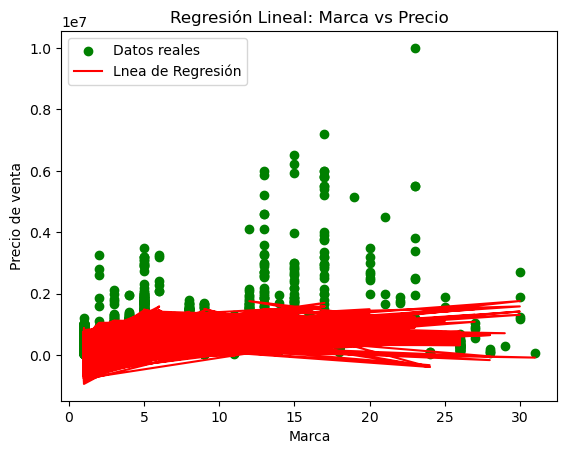

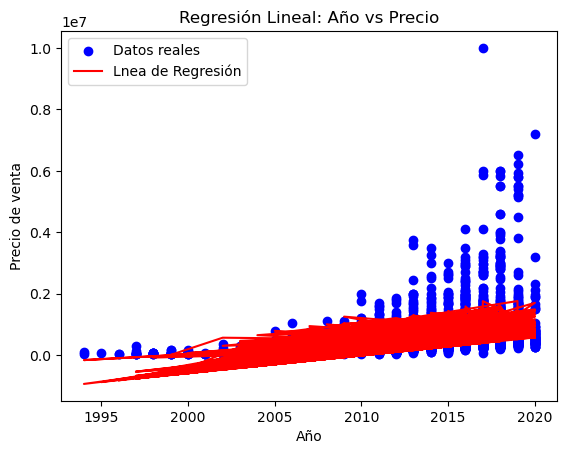

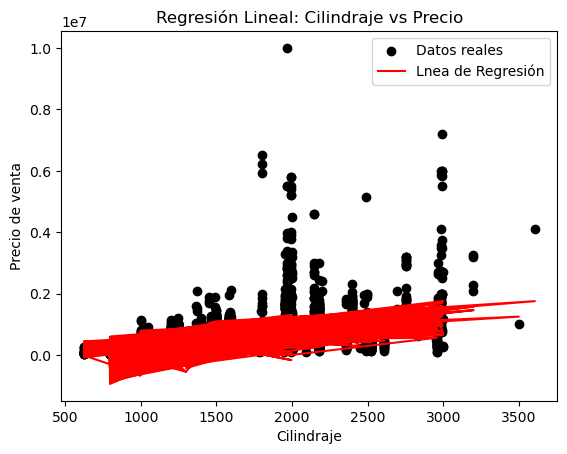

In [1227]:
# Primer modelo de Regresión Lineal df_sin_nulos

# Separar las variables independientes y dependientes
X = df_sin_nulos[['marca','year','motor_cc']]
y = df_sin_nulos['selling_price']

# Se crea el modelo
modelo = LinearRegression()

# Se ajusta el modelo a los datos
modelo.fit(X,y)

#Coeficiente de la regresión
beta_0 = modelo.intercept_ # Intercepto
beta_1, beta_2, beta_3 = modelo.coef_ # Pendientes (marca, año y motor)

#Mostrar los coeficientes
print(f'Intercepto (β0): {beta_0}')
print(f'Coeficiente (marca, β1): {beta_1}')
print(f'Intercepto (year, β2): {beta_2}')
print(f'Intercepto (motor_cc, β3): {beta_3}')

#visualizar la regresión

plt.scatter(df_sin_nulos['marca'], y, color='green', label= 'Datos reales')
plt.plot(df_sin_nulos['marca'], modelo.predict(X), color='red', label='Lnea de Regresión')
plt.xlabel('Marca')
plt.ylabel('Precio de venta')
plt.title('Regresión Lineal: Marca vs Precio')
plt.legend()
plt.show()

plt.scatter(df_sin_nulos['year'], y, color='blue', label= 'Datos reales')
plt.plot(df_sin_nulos['year'], modelo.predict(X), color='red', label='Lnea de Regresión')
plt.xlabel('Año')
plt.ylabel('Precio de venta')
plt.title('Regresión Lineal: Año vs Precio')
plt.legend()
plt.show()

plt.scatter(df_sin_nulos['motor_cc'], y, color='black', label= 'Datos reales')
plt.plot(df_sin_nulos['motor_cc'], modelo.predict(X), color='red', label='Lnea de Regresión')
plt.xlabel('Cilindraje')
plt.ylabel('Precio de venta')
plt.title('Regresión Lineal: Cilindraje vs Precio')
plt.legend()
plt.show()


In [1233]:
# Predecir precios para dos nuevos valores
nuevo_X = np.array([[1, 2014, 1248], [5, 2015, 2982]])  # Nuevos valores (marca, año y motor)
predicciones = modelo.predict(nuevo_X)

# Mostrar las predicciones
print("\nPredicciones:")
for i, pred in enumerate(predicciones):
    print(f"Predicción {i+1} para (Marca: {nuevo_X[i][0]}, Modelo: {nuevo_X[i][1]}, Cilindraje: {nuevo_X[i][2]}): {pred:.2f} USD")


Predicciones:
Predicción 1 para (Marca: 1, Modelo: 2014, Cilindraje: 1248): 428369.58 USD
Predicción 2 para (Marca: 5, Modelo: 2015, Cilindraje: 2982): 1299497.55 USD


C:\Users\GABRIEL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [1235]:
# Importar librerías necesarias
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluacion del modelo 

X = df_sin_nulos[['marca','year','motor_cc']]
y = df_sin_nulos['selling_price']

# Se crea el modelo
modelo = LinearRegression()

# Se ajusta el modelo a los datos
modelo.fit(X,y)

# Realizar predicciones en los datos de entrenamiento
predicciones = modelo.predict(X)

# Calcular las métricas de evaluación
r2 = r2_score(y, predicciones)  # Coeficiente de determinación R²
mae = mean_absolute_error(y, predicciones)  # Error Absoluto Medio
mse = mean_squared_error(y, predicciones)   # Error Cuadrático Medio
rmse = np.sqrt(mse)                         # Raíz del Error Cuadrático Medio

# Imprimir las métricas
print(f'R² (Coeficiente de determinación): {r2}')
print(f'Error Absoluto Medio (MAE): {mae}')

R² (Coeficiente de determinación): 0.39157088204863033
Error Absoluto Medio (MAE): 205733.319337881


Intercepto (β0): -104485495.02106616
Coeficiente (year, β1): 51585.69561273376
Intercepto (motor_cc, β2): 372.3136981940406
Intercepto (fuel, β3): -48667.174274363315
Intercepto (transmission, β3): 623982.4298982944


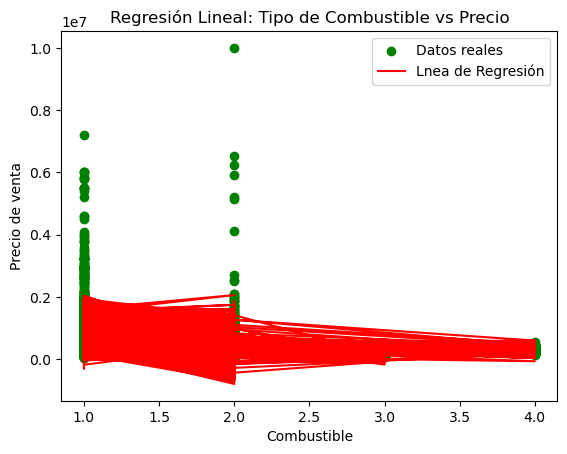

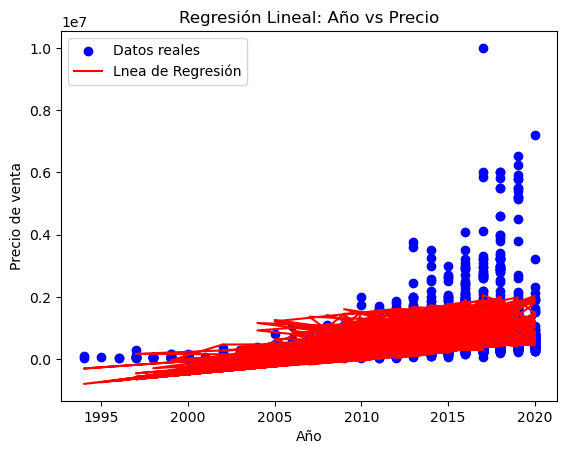

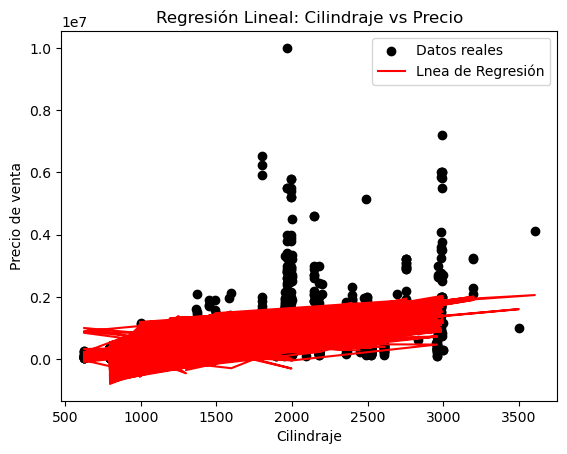

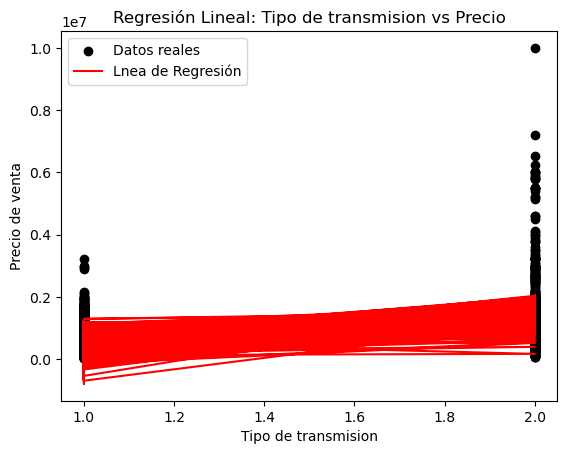

In [1237]:
# Segundo modelo de Regresión Lineal df_sin_nulos

# Separar las variables independientes y dependientes
X = df_sin_nulos[['year','motor_cc','fuel','transmission']]
y = df_sin_nulos['selling_price']

# Se crea el modelo
modelo = LinearRegression()

# Se ajusta el modelo a los datos
modelo.fit(X,y)

#Coeficiente de la regresión
beta_0 = modelo.intercept_ # Intercepto
beta_1, beta_2, beta_3, beta_4 = modelo.coef_ # Pendientes (año, motor, fuel y transmision)

#Mostrar los coeficientes
print(f'Intercepto (β0): {beta_0}')
print(f'Coeficiente (year, β1): {beta_1}')
print(f'Intercepto (motor_cc, β2): {beta_2}')
print(f'Intercepto (fuel, β3): {beta_3}')
print(f'Intercepto (transmission, β3): {beta_4}')

#visualizar la regresión

plt.scatter(df_sin_nulos['fuel'], y, color='green', label= 'Datos reales')
plt.plot(df_sin_nulos['fuel'], modelo.predict(X), color='red', label='Lnea de Regresión')
plt.xlabel('Combustible')
plt.ylabel('Precio de venta')
plt.title('Regresión Lineal: Tipo de Combustible vs Precio')
plt.legend()
plt.show()

plt.scatter(df_sin_nulos['year'], y, color='blue', label= 'Datos reales')
plt.plot(df_sin_nulos['year'], modelo.predict(X), color='red', label='Lnea de Regresión')
plt.xlabel('Año')
plt.ylabel('Precio de venta')
plt.title('Regresión Lineal: Año vs Precio')
plt.legend()
plt.show()

plt.scatter(df_sin_nulos['motor_cc'], y, color='black', label= 'Datos reales')
plt.plot(df_sin_nulos['motor_cc'], modelo.predict(X), color='red', label='Lnea de Regresión')
plt.xlabel('Cilindraje')
plt.ylabel('Precio de venta')
plt.title('Regresión Lineal: Cilindraje vs Precio')
plt.legend()
plt.show()

plt.scatter(df_sin_nulos['transmission'], y, color='black', label= 'Datos reales')
plt.plot(df_sin_nulos['transmission'], modelo.predict(X), color='red', label='Lnea de Regresión')
plt.xlabel('Tipo de transmision')
plt.ylabel('Precio de venta')
plt.title('Regresión Lineal: Tipo de transmision vs Precio')
plt.legend()
plt.show()

In [1239]:
# Importar librerías necesarias
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluacion del modelo 

X = df_sin_nulos[['year','motor_cc','fuel','transmission']]
y = df_sin_nulos['selling_price']

# Se crea el modelo
modelo = LinearRegression()

# Se ajusta el modelo a los datos
modelo.fit(X,y)

# Realizar predicciones en los datos de entrenamiento
predicciones = modelo.predict(X)

# Calcular las métricas de evaluación
r2 = r2_score(y, predicciones)  # Coeficiente de determinación R²
mae = mean_absolute_error(y, predicciones)  # Error Absoluto Medio
mse = mean_squared_error(y, predicciones)   # Error Cuadrático Medio
rmse = np.sqrt(mse)                         # Raíz del Error Cuadrático Medio

# Imprimir las métricas
print(f'R² (Coeficiente de determinación): {r2}')
print(f'Error Absoluto Medio (MAE): {mae}')

R² (Coeficiente de determinación): 0.48733968389482707
Error Absoluto Medio (MAE): 190885.14011767507


Intercepto (β0): -66919610.597755015
Coeficiente (year, β1): 32863.91148047229
Coeficiente (km_driven, β2): -0.6171980204176767
Coeficiente (fuel, β3): -37526.62677727199
Coeficiente (seller_type, β4): 94821.89156015632
Coeficiente (transmission, β5): 311002.9817832606
Coeficiente (owner, β6): -33113.29107183299
Coeficiente (seats, β7): -4936.732459524074
Coeficiente (marca, β8): 535.1494907689747
Coeficiente (consumo_kmpl, β9): 6367.046003803641
Coeficiente (motor_cc, β10): 91.13802143245809
Coeficiente (max_power_bhp, β11): 8523.38809821034


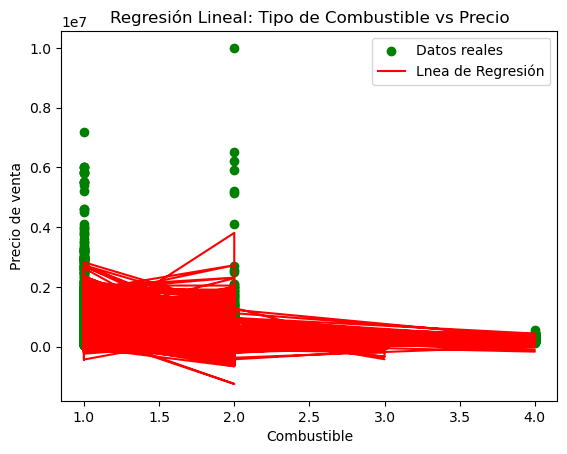

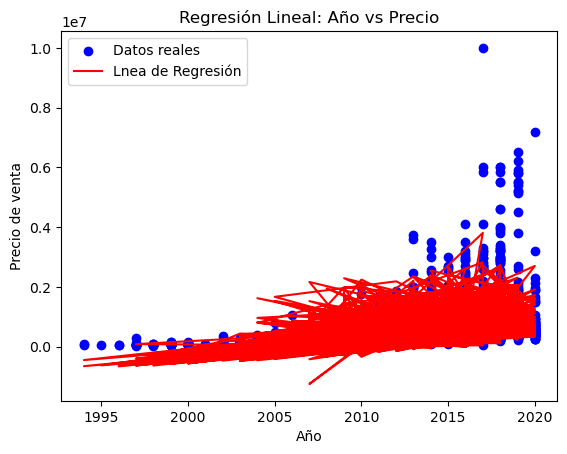

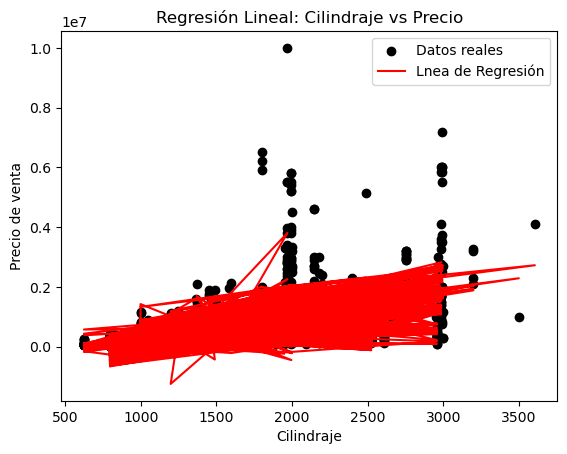

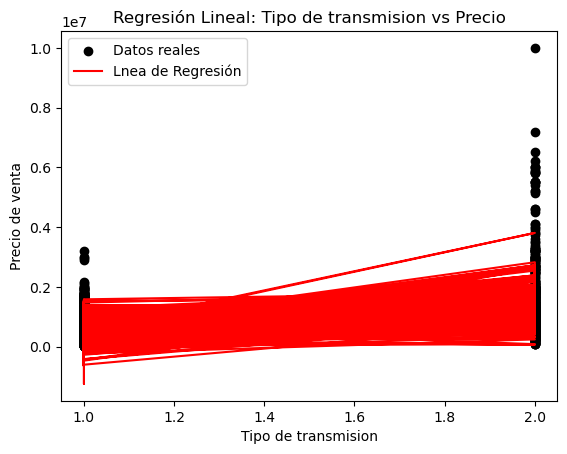

In [1247]:
# Tercer modelo de Regresión Lineal df_sin_nulos

# Separar las variables independientes y dependientes
X = df_sin_nulos[['year', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'seats', 'marca', 'consumo_kmpl', 'motor_cc', 'max_power_bhp']]
y = df_sin_nulos['selling_price']

# Se crea el modelo
modelo = LinearRegression()

# Se ajusta el modelo a los datos
modelo.fit(X,y)

#Coeficiente de la regresión
beta_0 = modelo.intercept_ # Intercepto
beta_1, beta_2, beta_3, beta_4, beta_5, beta_6, beta_7, beta_8, beta_9, beta_10, beta_11 = modelo.coef_ # Pendientes (año, motor, fuel y transmision)

#Mostrar los coeficientes
print(f'Intercepto (β0): {beta_0}')
print(f'Coeficiente (year, β1): {beta_1}')
print(f'Coeficiente (km_driven, β2): {beta_2}')
print(f'Coeficiente (fuel, β3): {beta_3}')
print(f'Coeficiente (seller_type, β4): {beta_4}')
print(f'Coeficiente (transmission, β5): {beta_5}')
print(f'Coeficiente (owner, β6): {beta_6}')
print(f'Coeficiente (seats, β7): {beta_7}')
print(f'Coeficiente (marca, β8): {beta_8}')
print(f'Coeficiente (consumo_kmpl, β9): {beta_9}')
print(f'Coeficiente (motor_cc, β10): {beta_10}')
print(f'Coeficiente (max_power_bhp, β11): {beta_11}')

#visualizar la regresión
plt.scatter(df_sin_nulos['fuel'], y, color='green', label= 'Datos reales')
plt.plot(df_sin_nulos['fuel'], modelo.predict(X), color='red', label='Lnea de Regresión')
plt.xlabel('Combustible')
plt.ylabel('Precio de venta')
plt.title('Regresión Lineal: Tipo de Combustible vs Precio')
plt.legend()
plt.show()

plt.scatter(df_sin_nulos['year'], y, color='blue', label= 'Datos reales')
plt.plot(df_sin_nulos['year'], modelo.predict(X), color='red', label='Lnea de Regresión')
plt.xlabel('Año')
plt.ylabel('Precio de venta')
plt.title('Regresión Lineal: Año vs Precio')
plt.legend()
plt.show()

plt.scatter(df_sin_nulos['motor_cc'], y, color='black', label= 'Datos reales')
plt.plot(df_sin_nulos['motor_cc'], modelo.predict(X), color='red', label='Lnea de Regresión')
plt.xlabel('Cilindraje')
plt.ylabel('Precio de venta')
plt.title('Regresión Lineal: Cilindraje vs Precio')
plt.legend()
plt.show()

plt.scatter(df_sin_nulos['transmission'], y, color='black', label= 'Datos reales')
plt.plot(df_sin_nulos['transmission'], modelo.predict(X), color='red', label='Lnea de Regresión')
plt.xlabel('Tipo de transmision')
plt.ylabel('Precio de venta')
plt.title('Regresión Lineal: Tipo de transmision vs Precio')
plt.legend()
plt.show()

In [1249]:
# Importar librerías necesarias
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluacion del modelo 

X = df_sin_nulos[['year', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'seats', 'marca', 'consumo_kmpl', 'motor_cc', 'max_power_bhp']]
y = df_sin_nulos['selling_price']

# Se crea el modelo
modelo = LinearRegression()

# Se ajusta el modelo a los datos
modelo.fit(X,y)

# Realizar predicciones en los datos de entrenamiento
predicciones = modelo.predict(X)

# Calcular las métricas de evaluación
r2 = r2_score(y, predicciones)  # Coeficiente de determinación R²
mae = mean_absolute_error(y, predicciones)  # Error Absoluto Medio
mse = mean_squared_error(y, predicciones)   # Error Cuadrático Medio
rmse = np.sqrt(mse)                         # Raíz del Error Cuadrático Medio

# Imprimir las métricas
print(f'R² (Coeficiente de determinación): {r2}')
print(f'Error Absoluto Medio (MAE): {mae}')

R² (Coeficiente de determinación): 0.6188785917629704
Error Absoluto Medio (MAE): 176058.52897227235
